 # MORPHOLOGICAL OPERATIONS



In [ ]:
import matplotlib.pyplot as plt
import cv2
from skimage import io, data, color
from skimage.util import img_as_ubyte
from skimage.morphology import (erosion, dilation, opening, closing,
                                white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)
from skimage.util import compare_images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# CONVENIENCE FUNCTION FOR DRAWING COMPARISONS
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

def plot_comparisonname(original, orig_name, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(orig_name)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

## Images

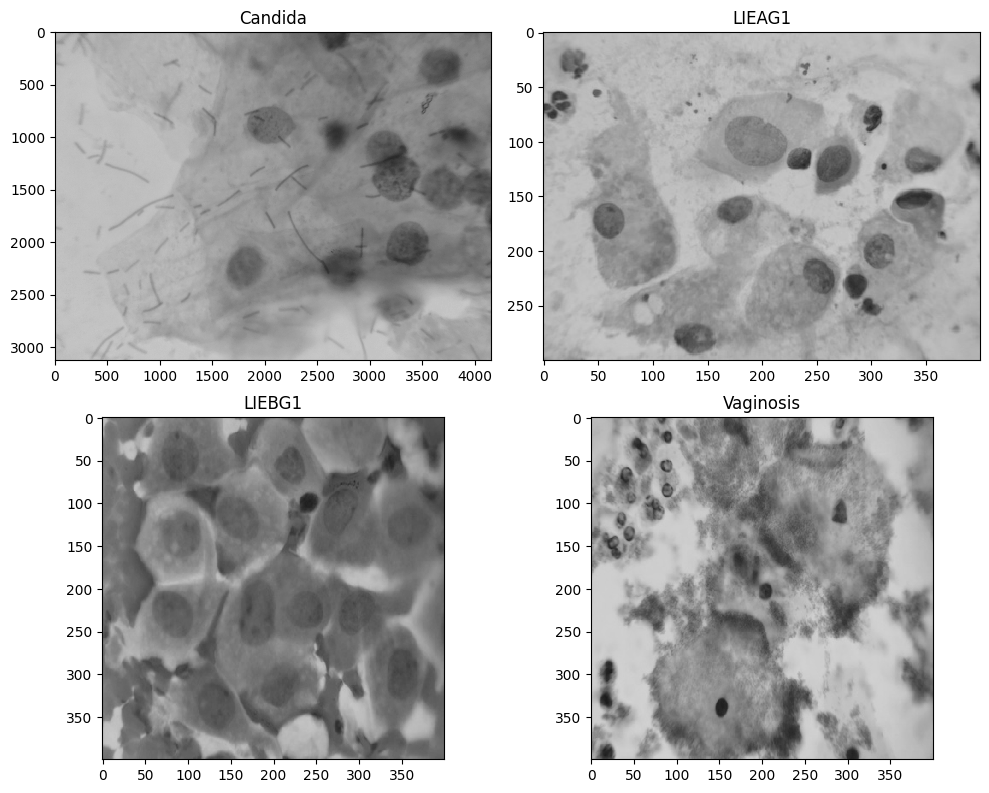

In [ ]:
img_candida = '/content/drive/MyDrive/DEEP LEARNING/IMAGENES/candida.jpg'
img_LIEAG1 = '/content/drive/MyDrive/DEEP LEARNING/IMAGENES/LIEAG1.jpg'
img_LIEBG1 = '/content/drive/MyDrive/DEEP LEARNING/IMAGENES/LIEBG1.jpg'
img_vaginosis = '/content/drive/MyDrive/DEEP LEARNING/IMAGENES/vaginosis.jpg'

candida = io.imread(img_candida, as_gray=True)
lieag1 = io.imread(img_LIEAG1, as_gray=True)
liebg1 = io.imread(img_LIEBG1, as_gray=True)
vaginosis = io.imread(img_vaginosis, as_gray=True)


plt.figure(figsize=(10, 8))


plt.subplot(221)
io.imshow(candida)
plt.title('Candida')

plt.subplot(222)
io.imshow(lieag1)
plt.title('LIEAG1')

plt.subplot(223)
io.imshow(liebg1)
plt.title('LIEBG1')

plt.subplot(224)
io.imshow(vaginosis)
plt.title('Vaginosis')

plt.tight_layout()
plt.show()


## MORPHOLOGICAL OPERATIONS

The aim is to highlight the main elements (cells) by applying morphological filters.

### CANDIDA

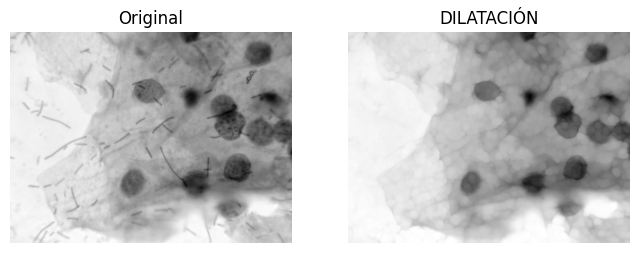

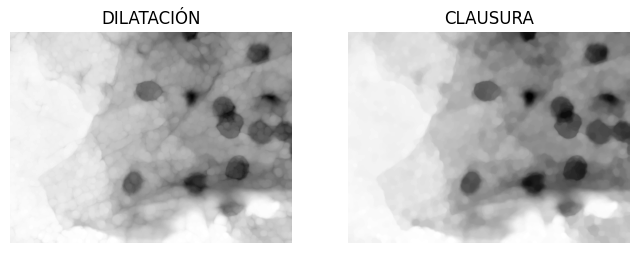

In [ ]:
dilatacion_c = dilation(candida, disk(30))
plot_comparison(candida, dilatacion_c, 'DILATACIÓN')
clausura_candida = closing(dilatacion_c, disk(35))
plot_comparisonname(dilatacion_c,'DILATACIÓN', clausura_candida, 'CLAUSURA')

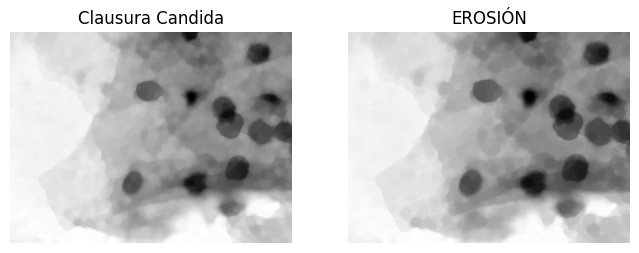

In [ ]:
erosion_candida = erosion(clausura_candida, disk(20))
plot_comparisonname(clausura_candida, 'Clausura Candida', erosion_candida, 'EROSIÓN')

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


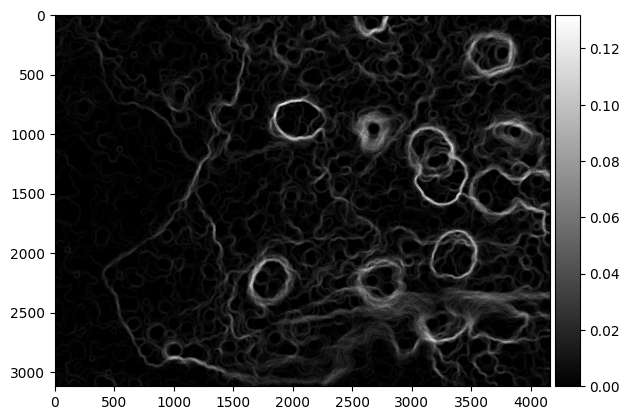

In [ ]:
resta = compare_images(clausura_candida, erosion_candida, method='diff')

io.imshow(resta, cmap=plt.cm.gray)
io.show();

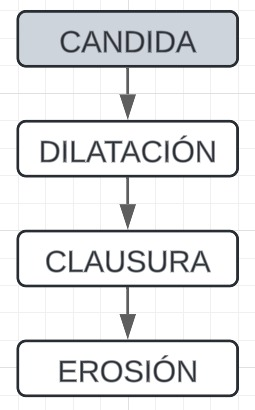

To highlight the cells in this image, we begin by eliminating the small fibers with dilation to give visibility to the cells. It is important to make appropriate use of the "disk" value to eliminate them. (By using a small value, a change is not evident). Following this, the visualization is complemented with closure and erosion in order to highlight these parts even more. Finally we have the image hosted in "erosion_candida"


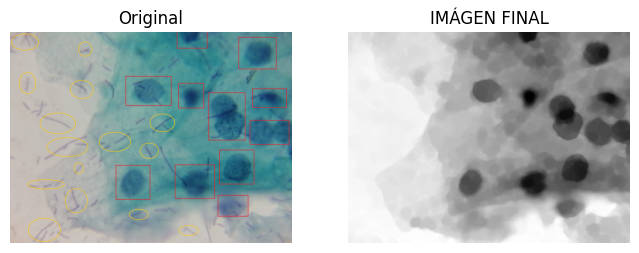

In [ ]:
candida111 = '/content/drive/MyDrive/DEEP LEARNING/IMAGENES/candida111.jpg'
candida11 = io.imread(candida111)

plot_comparison(candida11, erosion_candida, 'IMÁGEN FINAL')

Text(0.5, 1.0, 'IMÁGEN FINAL CANDIDA')

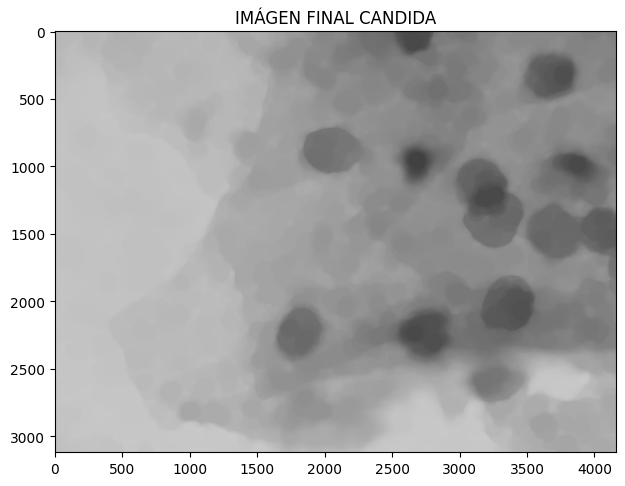

In [ ]:
io.imshow(erosion_candida)
plt.title('IMÁGEN FINAL CANDIDA')

As shown in the comparison made in the cell above, the original image has red boxes equivalent to the objective to be highlighted in the final image. The parts housed in the yellow circles refer to the fibers that we want to eliminate from the image.

### LIEAG1

Text(0.5, 1.0, 'OBJETIVO')

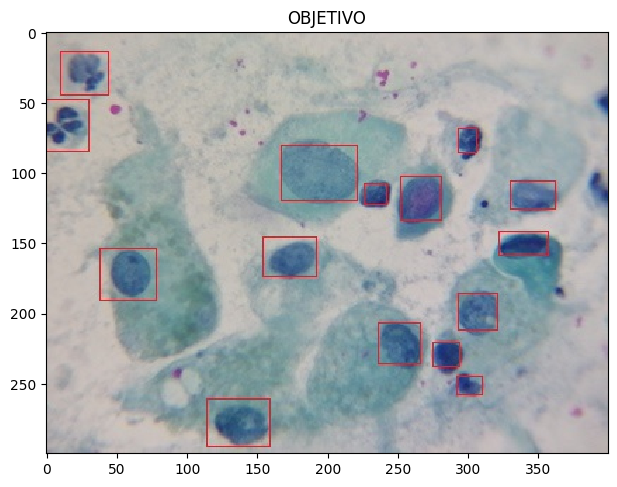

In [ ]:
LIEAG111 = '/content/drive/MyDrive/DEEP LEARNING/IMAGENES/EROSION111.jpg'
LIEAG11 = io.imread(LIEAG111)

io.imshow(LIEAG11)
plt.title('OBJETIVO')

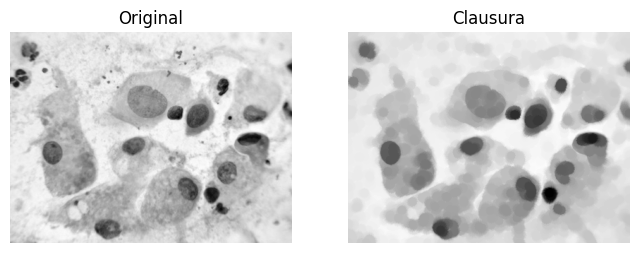

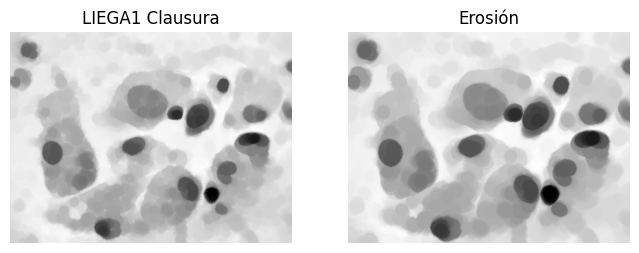

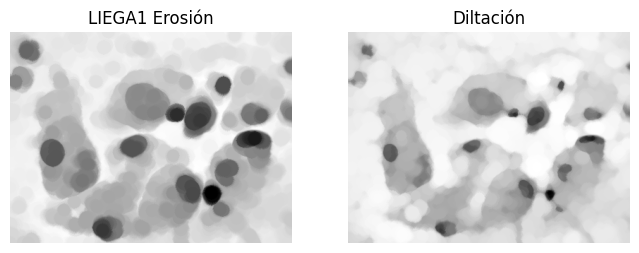

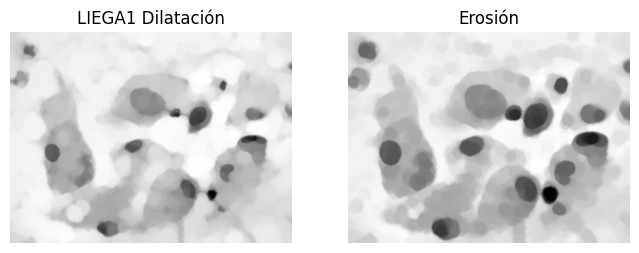

In [ ]:
closed_LIEAG1 = closing(lieag1, disk(6))
plot_comparison(lieag1, closed_LIEAG1, 'Clausura')

eroded_LIEAG1 = erosion(closed_LIEAG1, disk(3))
plot_comparisonname(closed_LIEAG1, 'LIEGA1 Clausura', eroded_LIEAG1, 'Erosión')

dil_LIEAG1 = dilation(eroded_LIEAG1, disk(7))
plot_comparisonname(eroded_LIEAG1, 'LIEGA1 Erosión', dil_LIEAG1, 'Diltación')

Ero_LIEAG1 = erosion(dil_LIEAG1, disk(5))
plot_comparisonname(dil_LIEAG1, 'LIEGA1 Dilatación', Ero_LIEAG1, 'Erosión')


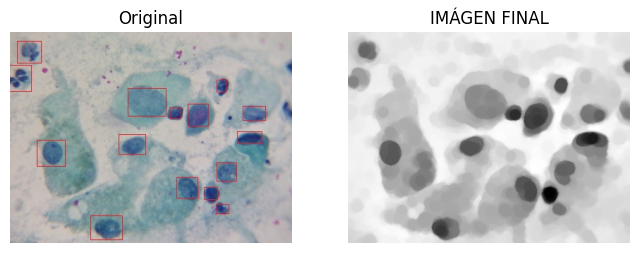

In [ ]:
plot_comparison(LIEAG11, Ero_LIEAG1, 'IMÁGEN FINAL')

![image.png](![image.png]())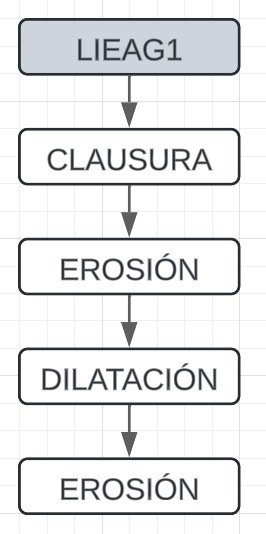

Mainly the aim is to eliminate noise by implementing closure, this because it begins with dilation which helps reduce it. Finally we obtain an image where we can see the nucleus of the cells to be analyzed.

### LIEBG1

Text(0.5, 1.0, 'OBJETIVO')

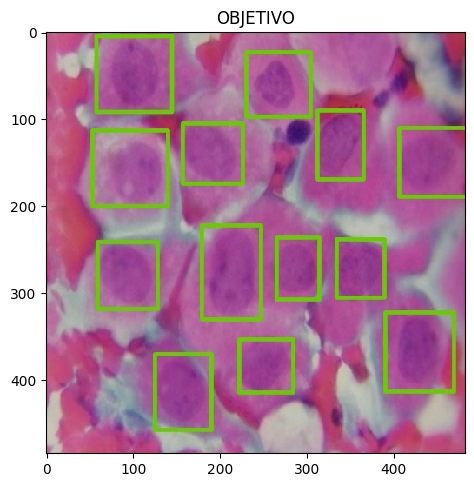

In [ ]:
LIEBG111 = '/content/drive/MyDrive/DEEP LEARNING/IMAGENES/LIBG111.jpeg'
LIEBG11 = io.imread(LIEBG111)

io.imshow(LIEBG111)
plt.title('OBJETIVO')

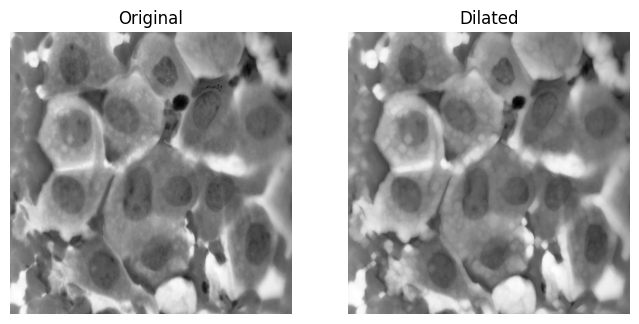

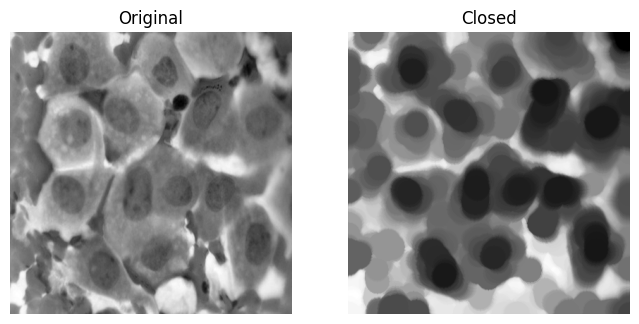

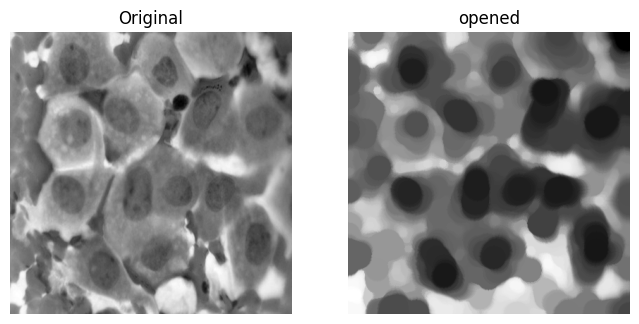

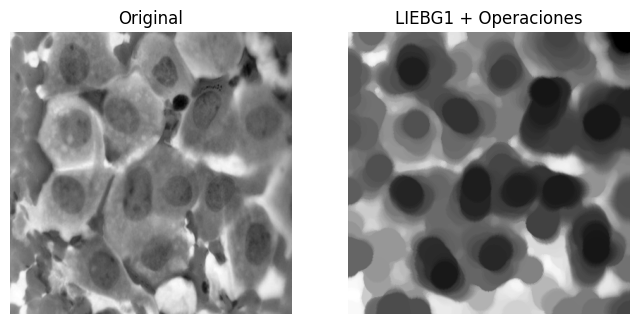

In [ ]:
footprint=disk(2)
dilated=dilation(liebg1, footprint)
plot_comparison(liebg1, dilated, 'Dilated')

footprint=disk(16)
closed=closing(dilated, footprint)
plot_comparison(liebg1, closed, 'Closed')

footprint=disk(5)
opened=opening(closed, footprint)
plot_comparison(liebg1, opened, 'opened')

footprint=disk(2)
eroded=erosion(opened, footprint)
plot_comparison(liebg1, eroded, 'LIEBG1 + Operaciones')

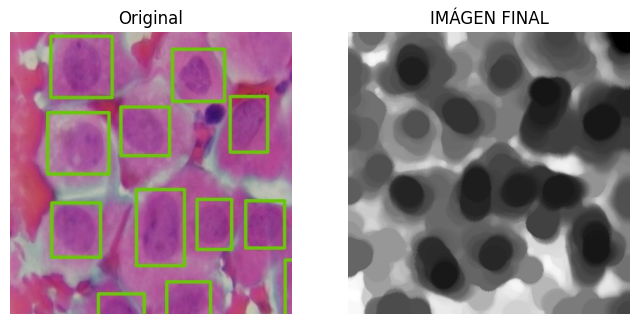

In [ ]:
plot_comparison(LIEBG11, eroded, 'IMÁGEN FINAL')

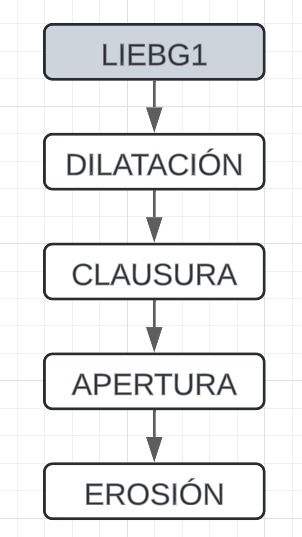

In this case we find a similarity in one of the previous images, in terms of the style and colors of the cells. This caused the peculiarity of being able to use the filter in a very similar way, at the analysis level it makes it easier to find the necessary combination to separate the cells and obtain a clearer result.

LIEBG1, is one of the most complicated images to treat since if observed, it has a point with more intensity close to the highlighted elements, this is why it is necessary to carry out a more in-depth analysis of the operations to be carried out and something very important is that in all operations it is necessary to perform iterations to find the correct value of disk().

### VAGINOSIS

Text(0.5, 1.0, 'OBJETIVO')

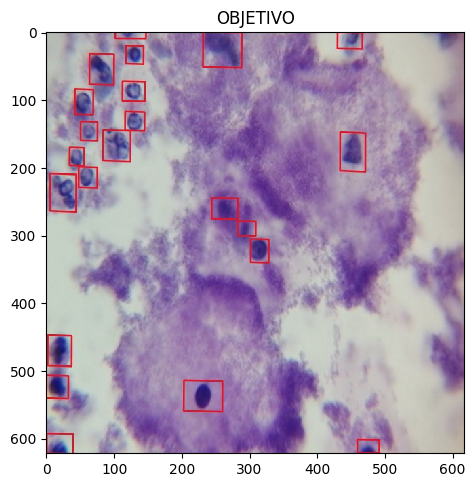

In [ ]:
vaginosis111 = '/content/drive/MyDrive/DEEP LEARNING/IMAGENES/vaginosos444.jpeg'
VAG11 = io.imread(vaginosis111)

io.imshow(VAG11)
plt.title('OBJETIVO')

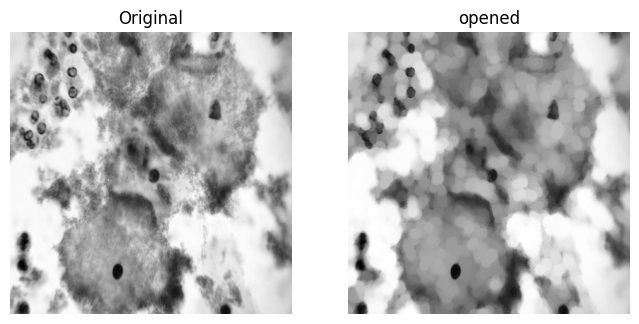

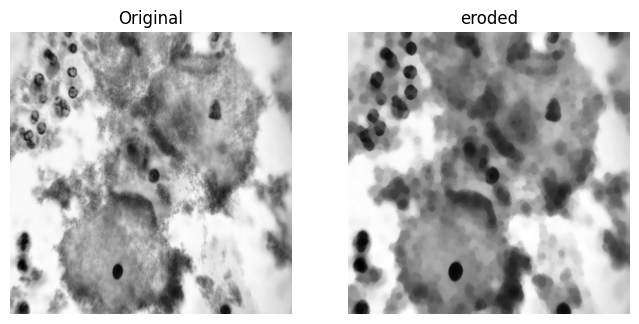

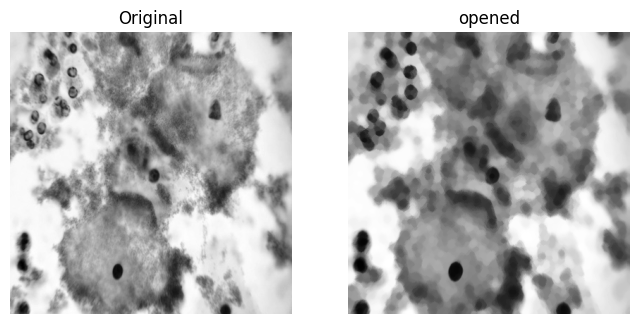

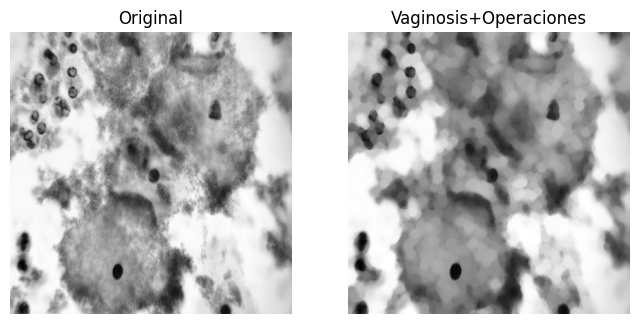

In [ ]:
footprint=disk(6)
opened=opening(vaginosis, footprint)
plot_comparison(vaginosis, opened, 'opened')

footprint=disk(3)
eroded=erosion(opened, footprint)
plot_comparison(vaginosis, eroded, 'eroded')

footprint=disk(3)
opened=opening(eroded, footprint)
plot_comparison(vaginosis, opened, 'opened')

footprint=disk(2)
dilated=dilation(opened, footprint)
plot_comparison(vaginosis, dilated, 'Vaginosis+Operaciones')

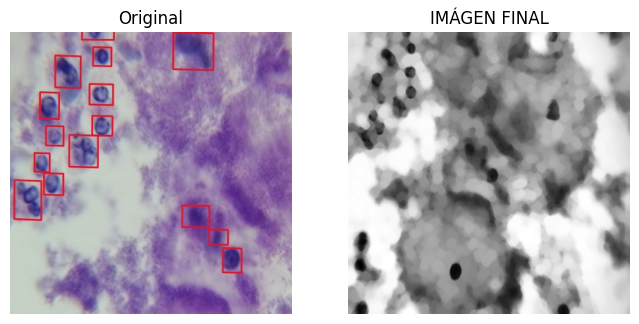

In [ ]:
plot_comparison(VAG11, dilated, 'IMÁGEN FINAL')

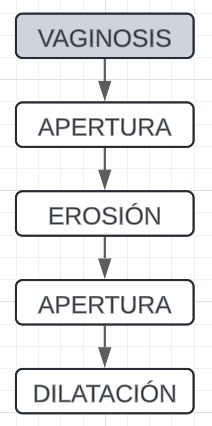

Before moving on to the results, it is important to highlight the role that morphological filters play, since they are a powerful tool for image processing in Deep Vision. Their simplicity, efficiency, and ability to extract specific features make them a valuable choice for a wide range of applications; However, due to this it must also be understood that choosing the filters and their combination will make the result better or worse. In this laboratory we can show that, if we apply the same filter to all the images, it will not be equally efficient. The conclusions we obtain with the filters are:

- Images 1 and 3 showed the best results, with the cells highlighted in deep black.

- Image 4 also showed highlighting, but less precise due to the similarity of the cells with the rest of the image.

- Image 2 presented difficulties due to the proximity of the cells and their similarity to adjacent pixels.